# HW 1 Part 1: Preprocessing the Credit Approval Dataset

Perform the following tasks on the credit approval dataset (crx.data contains the dataset and crx.names contains the description of the dataset). High pass and low pass specifications are on Canvas. Please note that ALL questions labelled [LP] must be completed satisfactorily to receive a low pass on the assignment. The [HP] question specifications combine all parts of the homework. Please refer to Canvas for more details.

Note that if you are unable to complete any of the LP questions satisfactorily, you will receive a grade of "revision required". You can revise and resubmit your work in exchange for a token. Please review the syllabus for more information on specifications grading.

**VERY IMPORTANT**: Include **ALL** the references you used for this assignment, including names of classmates you discuss with. Failure to cite your sources counts as an act of academic dishonesty and will be taken seriously without zero tolerance. You will automatically receive a “fail” grade in the homework and further serious penalties may be imposed.

NOTE: You can look for help on the Internet but refrain from referencing too much. Please cite all your sources in your submission. 
When you submit your assignment, you automatically agree to the following statement. If you do not agree, it is your responsibility to provide the reason.

“*I affirm that I have neither given nor received unauthorized help in completing this homework. I am not aware of others receiving such help. I have cited all the sources in the solution file.*”

In [1]:
## Your code goes here. Import the csv into a pandas dataframe here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./crx.data', header=None, na_values="?")


[LP 1] Deal with the missing values in the credit analysis dataset. Explain what you did with the following columns:

1. Column A1 (at index 0) 
2. Column A2 (at index 1)
3. Column A4 (at index 3)
4. Column A5 (at index 4)
5. Column A6 (at index 5)
6. Column A7 (at index 6)
7. Column A14 (at index 13)



Following the class activities performed in class on the credit approval dataset, the names file gives us a list of attributes with missing values. In class we dealt with the missing values using a pandas function parameter. When we read the data into a DataFrame, we can set na_values = "?", so that when pandas is reading the data, it treats the ? as a missing value. After missing values are read correctly, we can now take a look at each one the columns below to deal with the missing values. 

For attributes with categorical data, we can look at the more frequently occuring category aka mode and replace the null values with the mode. 

For attributes with numerical data, we can look at the mean value of the given attribute and replace null values with the mean. 



1. Column A1, is categorical a,b data with top category being b, and has 12 missing values
2. Column A2, is numerical and has 12 "?" missing values.
3. Column A4, is categorical and has 6 missing values
4. Column A5, is categorical and has 6 missing values
5. Column A6, is categorical and has 9 missing values
6. Column A7, is categorical and has 9 missing values
7. Column A14, is numerical and has 13 missing values

For all the attributes with categorical data, using value_counts() function to see the frequencey of each category. 

For all the attributes with numerical data, using describe() function to see the mean of the attribute. 

After observing the data, I want to fill in null values for numerical data with the attribute mean and categorical data with mode of the attribute. 

In [2]:
## Your code for LP 1 goes here.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    object 
 1   1       678 non-null    float64
 2   2       690 non-null    float64
 3   3       684 non-null    object 
 4   4       684 non-null    object 
 5   5       681 non-null    object 
 6   6       681 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      677 non-null    float64
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [275]:
df.iloc[:16, :]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


In [276]:
df[15].value_counts

<bound method IndexOpsMixin.value_counts of 0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: 15, Length: 690, dtype: object>

In [277]:
df[0].value_counts()

b    468
a    210
Name: 0, dtype: int64

In [278]:
df[1].describe()

count    678.000000
mean      31.568171
std       11.957862
min       13.750000
25%       22.602500
50%       28.460000
75%       38.230000
max       80.250000
Name: 1, dtype: float64

In [279]:
df[3].value_counts()

u    519
y    163
l      2
Name: 3, dtype: int64

In [280]:
df[4].value_counts()

g     519
p     163
gg      2
Name: 4, dtype: int64

In [281]:
df[5].value_counts()

c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: 5, dtype: int64

In [282]:
df[6].value_counts()

v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: 6, dtype: int64

In [283]:
df[13].describe()

count     677.000000
mean      184.014771
std       173.806768
min         0.000000
25%        75.000000
50%       160.000000
75%       276.000000
max      2000.000000
Name: 13, dtype: float64

In [3]:
df = df.fillna(df.mean(numeric_only=True))
print(df.info())
print("Null values after filling in numerical data: ", df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    object 
 1   1       690 non-null    float64
 2   2       690 non-null    float64
 3   3       684 non-null    object 
 4   4       684 non-null    object 
 5   5       681 non-null    object 
 6   6       681 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    float64
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB
None
Null values after filling in numerical data:  42


In [285]:
df.head(16)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


In [286]:
print(df[1].describe())

count    690.000000
mean      31.568171
std       11.853273
min       13.750000
25%       22.670000
50%       28.625000
75%       37.707500
max       80.250000
Name: 1, dtype: float64


In [287]:
print(df[13].describe())

count     690.000000
mean      184.014771
std       172.159274
min         0.000000
25%        80.000000
50%       160.000000
75%       272.000000
max      2000.000000
Name: 13, dtype: float64


In [11]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode())
print(df.info())
print("Null values after filling in categorical data: ", df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    float64
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    float64
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB
None
Null values after filling in categorical data:  0


In [13]:
print(df[0].value_counts())
print(df[3].value_counts())
#print(df[4].value_counts())
#print(df[5].value_counts())
#print(df[6].value_counts())


b    480
a    210
Name: 0, dtype: int64
u    525
y    163
l      2
Name: 3, dtype: int64


In [14]:
print(df[4].value_counts())

g     525
p     163
gg      2
Name: 4, dtype: int64


In [15]:
print(df[5].value_counts())

c     146
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: 5, dtype: int64


In [16]:
print(df[6].value_counts())

v     408
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: 6, dtype: int64


In [17]:
print(df[8].value_counts())

t    361
f    329
Name: 8, dtype: int64


In [18]:
print(df[9].value_counts())

f    395
t    295
Name: 9, dtype: int64


In [19]:
print(df[11].value_counts())

f    374
t    316
Name: 11, dtype: int64


In [20]:
print(df[12].value_counts())

g    625
s     57
p      8
Name: 12, dtype: int64


* A1 has two cat: a, b
* A4 has three cat: u, y, l; where l only occurs 2 times
* A5 has 3 cat: g, p, gg, where gg only occurs 2 times
* A6 has 14 categories:
    - need to set max category or set a min frequency for number of n samples. 
* A7 has 9 cat: v, h, bb, ff are more relevant
    - j, z, dd, n , o : occur less frequently, will be considered infrequent
* A9, A10, and A12 have two of same cat: t and f
* A13 has has three categories: g, s, and p
    - p occurs 8 times. 


[LP 2] Use encoders and convert the categorical variables to numerical values: Columns A1, A4, A5, A6, A7, A9, A10, A12, A13


In [66]:
## Your code for LP 2 goes here. 
from sklearn.preprocessing import OneHotEncoder

#setting min_frequency to be 51 to handle 
#this deals with df5 and df6 since both have multi-columns
#considers val < 55 to be infrequent
ohe = OneHotEncoder(handle_unknown='ignore', min_frequency=55)

ohe_df0 = pd.DataFrame(ohe.fit_transform(df[[0]]).toarray())
ohe_df3 = pd.DataFrame(ohe.fit_transform(df[[3]]).toarray())
ohe_df4 = pd.DataFrame(ohe.fit_transform(df[[4]]).toarray())
ohe_df8 = pd.DataFrame(ohe.fit_transform(df[[8]]).toarray())
ohe_df9 = pd.DataFrame(ohe.fit_transform(df[[9]]).toarray())
ohe_df11 = pd.DataFrame(ohe.fit_transform(df[[11]]).toarray())
ohe_df5 = pd.DataFrame(ohe.fit_transform(df[[5]]).toarray())
ohe_df6 = pd.DataFrame(ohe.fit_transform(df[[6]]).toarray())
ohe_df12 = pd.DataFrame(ohe.fit_transform(df[[12]]).toarray())


In [67]:
print(ohe_df5)
print(ohe_df6)

       0    1    2    3    4
0    0.0  0.0  0.0  1.0  0.0
1    0.0  0.0  1.0  0.0  0.0
2    0.0  0.0  1.0  0.0  0.0
3    0.0  0.0  0.0  1.0  0.0
4    0.0  0.0  0.0  1.0  0.0
..   ...  ...  ...  ...  ...
685  0.0  0.0  0.0  0.0  1.0
686  1.0  0.0  0.0  0.0  0.0
687  0.0  0.0  0.0  0.0  1.0
688  0.0  0.0  0.0  0.0  1.0
689  1.0  0.0  0.0  0.0  0.0

[690 rows x 5 columns]
       0    1    2    3    4
0    0.0  0.0  0.0  1.0  0.0
1    0.0  0.0  1.0  0.0  0.0
2    0.0  0.0  1.0  0.0  0.0
3    0.0  0.0  0.0  1.0  0.0
4    0.0  0.0  0.0  1.0  0.0
..   ...  ...  ...  ...  ...
685  0.0  0.0  1.0  0.0  0.0
686  0.0  0.0  0.0  1.0  0.0
687  0.0  1.0  0.0  0.0  0.0
688  0.0  0.0  0.0  1.0  0.0
689  0.0  0.0  1.0  0.0  0.0

[690 rows x 5 columns]


In [291]:
df[0].value_counts()

1    468
0    210
2     12
Name: 0, dtype: int64

In [292]:
df.head(25)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,30.83,0.000,1,0,12,7,1.250,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.040,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.500,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.750,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.710,1,0,0,0,2,120.0,0,0
5,1,32.08,4.000,1,0,9,7,2.500,1,0,0,1,0,360.0,0,0
6,1,33.17,1.040,1,0,11,3,6.500,1,0,0,1,0,164.0,31285,0
7,0,22.92,11.585,1,0,2,7,0.040,1,0,0,0,0,80.0,1349,0
8,1,54.42,0.500,2,2,8,3,3.960,1,0,0,0,0,180.0,314,0
9,1,42.50,4.915,2,2,12,7,3.165,1,0,0,1,0,52.0,1442,0


(array([[690.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [690.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [690.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [690.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [690.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [690.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [690.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [690.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [690.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [690.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [690.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [690.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [690.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [690.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [677.,   8.,

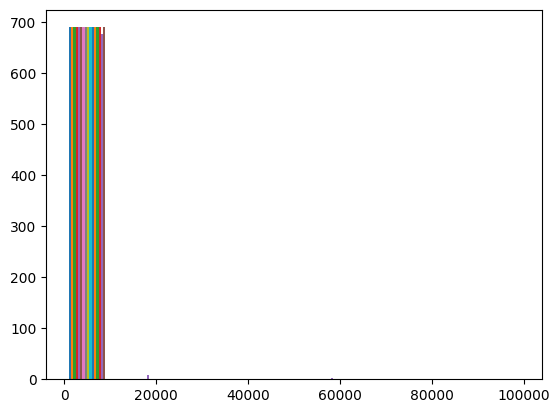

In [293]:
plt.hist(df)

[HP 1] Describe your choices to preprocess these columns and explain why they are appropriate for the column.

## Note: Using the information given in crx.names file to preprocess the dataset, considering each given attribute in the dataset is anonymous. 

### Steps to Preprocess:
    * To preprocess data, we first clean incomplete, noisy, and inconsistent data to improve the quality of data. 
        * This dataset has a few null values in some of the attributes and noisy data as in outliers in few of the attributes. Filling in missing values is handled in LP1.
    * Data Integration takes place next, since this is a single dataset, I will not be integrating any datasets together.
    * Data Transformation, we can smooth out data and we can perform normalization using a scaler. 

    * Note Revision, fixed encoding and explanation:
        * In LP2, I use One Hot Encoder to convert categorical data into numerical data. I applied One Hot Encoder on the categorical attributes since the meaning behind each feature is anonymous so we can treat all data to be numerical(without nominal meaning) for most machine learning algorithms and statistical analysis. One downside to OneHot Encoding is the dimensionality curse. It increases the number of dimensions in the dataset which can be dealt with the use of PCA or clustering to reduce dimensionality. For each category in a feature, a new column is assigned to encode data. I did not use Label Encoder or Ordinal encoder in this part as they would imply an ordinal meaning behind the features in the dataset. This does not apply if we are considering all data to be anonymous without meaning. 
    * In LP3, I use MinMaxScaler to perform data Normalization on all the features in the dataset after all the data is numerical with the range of {0,1}. MinMaxScaler ensures all data points will have the same scale so that every feature is given equal thought when model fitting. Also, it is noticable that some of the features have outliers after scaling the data which is a downside to MinMaxScaler. I decided to keep the outliers to refrain from having baised data as the meaning behind each feature is unknown. 
    * Data reduction and Discretization are the last two steps which I have not applied.

There are a total of 16 attributes with 690 instances. Some attributes required similar approaches to preprocess the data. See preprocessing approach on data cleaning for each column below:

1.) For A1, the column is categorical with two categories and 12 missing values. This requires filling in missing values. When deciding to fill_na, I chose the mode of the column and filled in all null values with the mode. 

2.) For A2, the column is numerical with 12 missing values. Data cleaning is required to fill in missing values. When deciding to fill_na, I chose the mean of the column and filled in all null values with the attribute mean. 

3.) For A3, the column is numerical with no missing values. Therefore, decided to leave column as is. 

4.) For A4, the column is categorical with 4 categories and 6 missing values. Data cleaning is required to fill in the missing values. When deciding to fill_na, I chose the mode of the column and filled in all null values with the mode. 

5.) For A5, the column is categorical with 3 categories and 6 missing values. Data cleaning is required to fill in missing values. When deciding to fill_na, I chose the mode of the column and filled in all null values with the mode. 

6.) For A6, the column is categorical with 14 different categories and 9 missing values. Data cleaning is required to fill in the missing values. When deciding to fill_na, I chose the mode of the column and filled in all null values with the mode. 

7.) For A7, the column is categorical with 9 categories and 9 missing values. Data cleaning is required to fill in the missing values. When deciding to fill_na, I chose the mode of the column and filled in all null values with the mode. 

8.) For A8, the column is numerical and has no missing values. Decided to leave column as is. 

9.) For A9, A10, and A12, the columns are categorical with the same categories and have no missing values in each of the columns. Decided to leave the columns as is.

10.) For A11, the column is continuous and has no missing values, so left the column as is.

11.) For A13, the column is categorical and has no missing values. Therefore, left the column as is. 

12.) For A14, the column is numerical with 13 missing values. Data cleaning is required to fill in null values. When deciding to fill_na, I chose the mean of the column and filled in all null values with the attribute mean. 

13.) For A15, the column is numerical and has no missing values, so left the column as is. 

14.) For A16, the column is categorical, class attribute. It has no missing values, so left the column as is. 

[LP 3] Use an appropriate scaler to scale the numerical values to a suitable range of values. Briefly explain the process you used.

C:\Users\Jaswa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'whiskers': [<matplotlib.lines.Line2D at 0x1d4bc1b5280>,
 'caps': [<matplotlib.lines.Line2D at 0x1d4bc1b57c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d4bc1a5fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d4bc1b5d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d4bc1b5fa0>],
 'means': []}

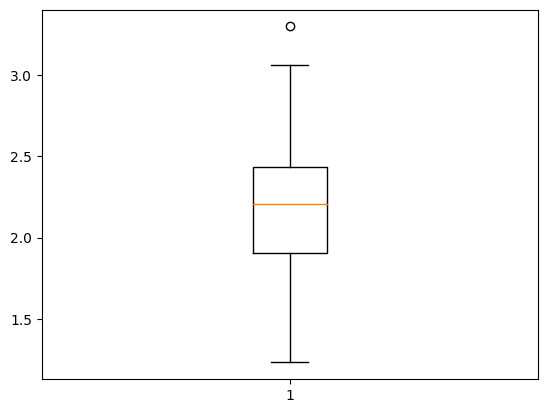

In [294]:
plt.boxplot(np.log10(df[13]))

C:\Users\Jaswa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Jaswa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


{'whiskers': [<matplotlib.lines.Line2D at 0x1d4bc209f70>,
 'caps': [<matplotlib.lines.Line2D at 0x1d4bc2184f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d4bc209cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d4bc218a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d4bc218cd0>],
 'means': []}

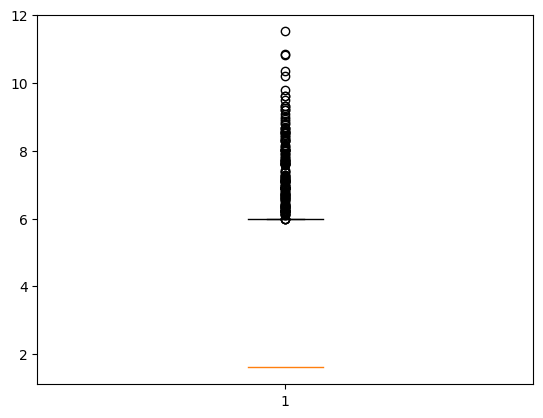

In [295]:
plt.boxplot(np.log(df[14]))

C:\Users\Jaswa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

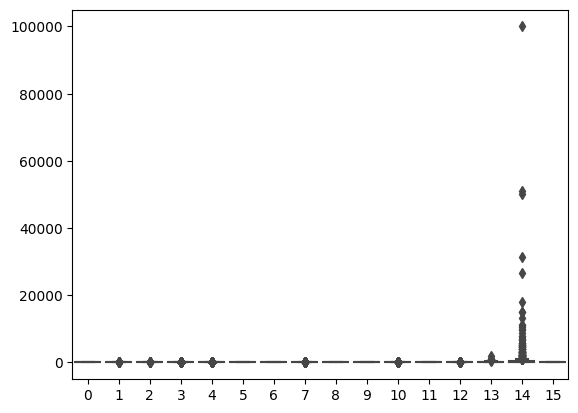

In [296]:
sns.boxplot(data=df)

C:\Users\Jaswa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\internals\blocks.py:352: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
C:\Users\Jaswa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
C:\Users\Jaswa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Jaswa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\function_bas

<AxesSubplot: >

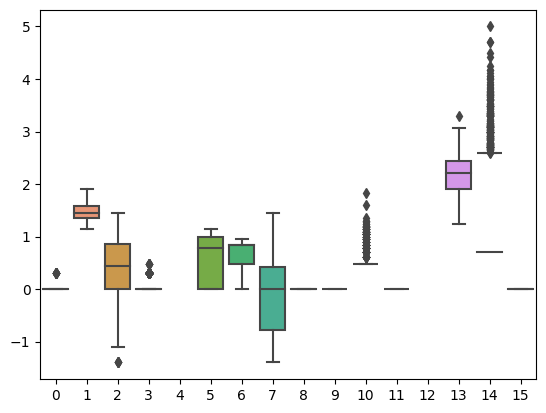

In [297]:
sns.boxplot(np.log10(df))

After filling in missing values and applying OneHot Encoder to convert all data into numeric, I plotted the dataset to visualize the normalized dataset. We can observer that columns 2 and 7 appear to have negative values while the rest of features seem to contain samples 0 and above. Also, features 10 and 14 appear to have significant outliers. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1d4bca06340>,
 'caps': [<matplotlib.lines.Line2D at 0x1d4bca06880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d4bca060a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d4bca06dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d4bca150a0>],
 'means': []}

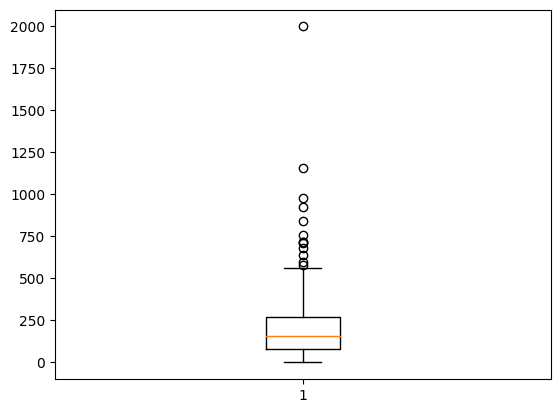

In [298]:
plt.boxplot(df[13])

C:\Users\Jaswa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Jaswa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


{'whiskers': [<matplotlib.lines.Line2D at 0x1d4bca7b820>,
 'caps': [<matplotlib.lines.Line2D at 0x1d4bca7bd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d4bca7b580>],
 'medians': [<matplotlib.lines.Line2D at 0x1d4bca8a2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d4bca8a580>],
 'means': []}

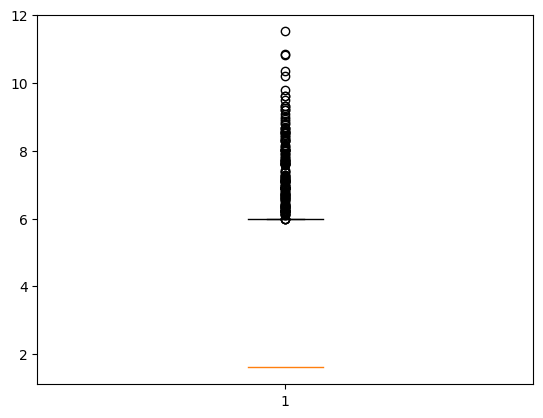

In [299]:
plt.boxplot(np.log(df[14]))

(array([416., 209.,  53.,   7.,   3.,   1.,   0.,   0.,   0.,   1.]),
 array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800., 2000.]),
 <BarContainer object of 10 artists>)

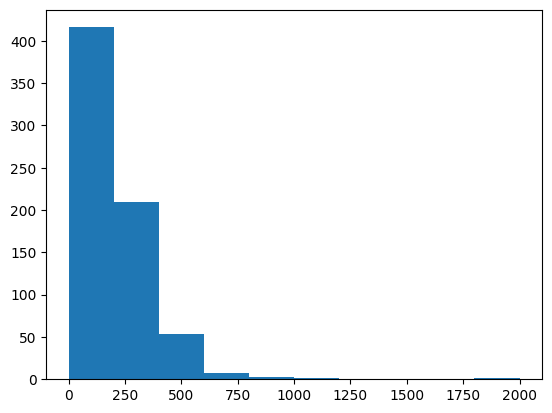

In [300]:
#plt.hist(df[14])
plt.hist(df[13])

In [301]:
## Your code for LP 3 goes here. 

from sklearn.preprocessing import MinMaxScaler

def preprocess_scaler(df):
    scaler = MinMaxScaler(feature_range=(0,1))
    return scaler.fit_transform(df)

In [302]:
clean_array = preprocess_scaler(df)
print(clean_array)

[[5.00000000e-01 2.56842105e-01 0.00000000e+00 ... 1.01000000e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.75488722e-01 1.59285714e-01 ... 2.15000000e-02
  5.60000000e-03 0.00000000e+00]
 [0.00000000e+00 1.61654135e-01 1.78571429e-02 ... 1.40000000e-01
  8.24000000e-03 0.00000000e+00]
 ...
 [0.00000000e+00 1.72932331e-01 4.82142857e-01 ... 1.00000000e-01
  1.00000000e-05 1.00000000e+00]
 [5.00000000e-01 6.27067669e-02 7.32142857e-03 ... 1.40000000e-01
  7.50000000e-03 1.00000000e+00]
 [5.00000000e-01 3.19548872e-01 1.20535714e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


(array([[210.,   0.,   0.,   0.,   0., 468.,   0.,   0.,   0.,  12.],
        [ 96., 209., 147.,  99.,  53.,  43.,  25.,   9.,   6.,   3.],
        [347., 129.,  55.,  72.,  51.,  19.,   7.,   5.,   2.,   3.],
        [  2.,   0.,   0., 519.,   0.,   0., 163.,   0.,   0.,   6.],
        [519.,   0.,   0.,   2.,   0.,   0., 163.,   0.,   0.,   6.],
        [191.,  41.,  55.,  53.,  59.,  61.,  38.,  81.,  64.,  47.],
        [ 59.,   6.,  57., 138.,   8.,   4.,   2., 399.,   8.,   9.],
        [523.,  95.,  37.,  12.,  12.,   6.,   2.,   2.,   0.,   1.],
        [329.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 361.],
        [395.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 295.],
        [595.,  72.,  20.,   1.,   0.,   1.,   0.,   0.,   0.,   1.],
        [374.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 316.],
        [625.,   0.,   0.,   0.,   0.,   8.,   0.,   0.,   0.,  57.],
        [416., 209.,  54.,   6.,   3.,   1.,   0.,   0.,   0.,   1.],
        [677.,   8.,

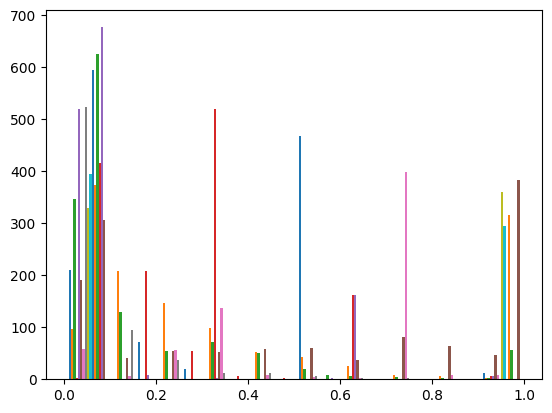

In [303]:
plt.hist(clean_array)

<AxesSubplot: >

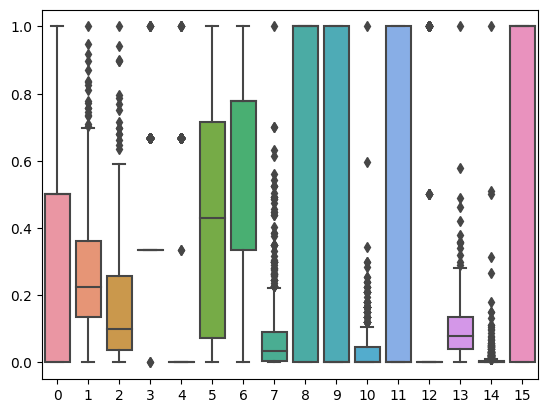

In [304]:
sns.boxplot(clean_array)

C:\Users\Jaswa\AppData\Local\Temp\ipykernel_4364\3084287542.py:1: RuntimeWarning: divide by zero encountered in log
  sns.boxplot(np.log(clean_array))
C:\Users\Jaswa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Jaswa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Jaswa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Jaswa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\Local

<AxesSubplot: >

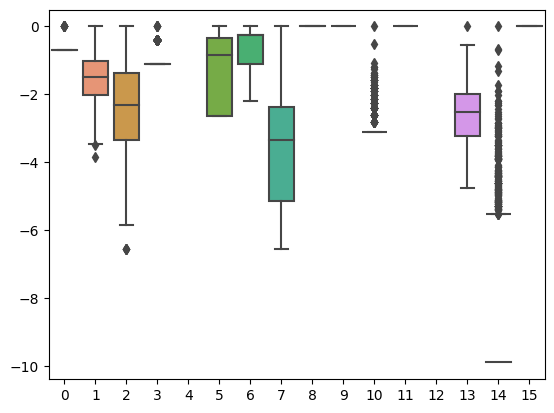

In [305]:
sns.boxplot(np.log(clean_array))

Save your clean dataset in a file called **crx_clean.data**. Submit this file along with the ipynb solution file. 

In [306]:
## Your code to save the dataframe to a csv file goes here.
df_clean = pd.DataFrame(clean_array)
df_clean.to_csv('crx_clean.data', index=False)

# References Links:
Include ALL your references here. 

https://pandas.pydata.org/docs/reference/frame.html

https://colab.research.google.com/drive/1Nif_BV5DfYhP8V9cVM17jgV6TaIAQE3d

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

# References Citations:
API design for machine learning software: experiences from the scikit-learn project, Buitinck et al., 2013.

“Compare the Effect of Different Scalers on Data With Outliers.” Scikit-learn, scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html. Accessed 7 Oct. 2022.

DataFrame — Pandas 1.5.0 Documentation. pandas.pydata.org/docs/reference/frame.html. Accessed 7 Oct. 2022.

Suresh, Mahima Agumbe. Google Colaboratory. colab.research.google.com/drive/1Nif_BV5DfYhP8V9cVM17jgV6TaIAQE3d. Accessed 7 Oct. 2022.

# What to turn in:
1. The ipynb solution file, which includes the references
2. If you use Colab or GitHub for version control, please share a link to your notebook or GitHub repository

https://github.com/ankitajaswal/Cmpe255

3. The crx_clean.data file
    
